In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
%qtconsole

In [4]:
%cd /Users/guchunhui/Documents/cgvae
%pwd

/Users/guchunhui/Documents/cgvae


/Users/guchunhui/opt/anaconda3/envs/cgvae/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/Users/guchunhui/Documents/cgvae'

In [25]:
df = pd.read_json('results/results2.json', lines=True)

In [20]:
df

# only keep seed=36
# df = df[df['seed'] == 38]

,dataset,split_ratio,seed,best_epochs,val_best_loss,AUC,AP,learning_rate,regularization,neg_sample_ratio,false_pos_edge_ratio,add_input_edges_to_output,execution_time,time_stamp
0,PubMed,0.2,36,802,0.5279,0.8416,0.8814,0.005,0,1,0.3,False,61.25,2024-09-04 18:31:39
1,PubMed,0.2,37,462,0.5504,0.8321,0.8615,0.005,0,1,0.3,False,40.68,2024-09-04 18:32:25
2,PubMed,0.2,38,463,0.5456,0.8203,0.8560,0.005,0,1,0.3,False,40.63,2024-09-04 18:33:11
3,PubMed,0.2,39,261,0.5710,0.8041,0.8346,0.005,0,1,0.3,False,28.42,2024-09-04 18:33:44
4,PubMed,0.2,40,445,0.5634,0.7973,0.8419,0.005,0,1,0.3,False,39.51,2024-09-04 18:34:29
5,PubMed,0.2,41,634,0.5466,0.8123,0.8525,0.005,0,1,0.3,False,51.01,2024-09-04 18:35:25
6,PubMed,0.2,42,385,0.5422,0.8086,0.8444,0.005,0,1,0.3,False,39.35,2024-09-04 18:36:10
7,PubMed,0.2,43,466,0.5446,0.8164,0.8496,0.005,0,1,0.3,False,50.33,2024-09-04 18:37:06
8,PubMed,0.2,44,555,0.5577,0.8091,0.8338,0.005,0,1,0.3,False,49.40,2024-09-04 18:38:02
9,PubMed,0.2,45,301,0.5797,0.8091,0.8458,0.005,0,1,0.3,False,34.01,2024-09-04 18:38:41


In [41]:
# calculate mean and std for auc and ap group by dataset and split_ratio
df_agg = df.groupby(['dataset', 'split_ratio', 'regularization']).agg({'AUC': ['mean', 'std'], 'AP': ['mean', 'std'], 'execution_time': ['mean', 'std']})
# ungroup the index
df_agg = df_agg.reset_index()

In [29]:
df_agg[df_agg['dataset'] == 'PubMed'].sort_values(by=['split_ratio', 'regularization'], ascending=False)

dataset split_ratio regularization      AUC                 AP          
                                         mean       std     mean       std
5  PubMed         0.2          10000  0.82670  0.009532  0.86055  0.009063
4  PubMed         0.2           1000  0.81805  0.012196  0.85191  0.012838
3  PubMed         0.2            100  0.81643  0.013596  0.85058  0.013907
2  PubMed         0.2             10  0.81530  0.013382  0.85029  0.014104
1  PubMed         0.2              1  0.81521  0.013209  0.85022  0.013964
0  PubMed         0.2              0  0.81509  0.013249  0.85015  0.014042

# plot AUC for each dataset and each split_ratio, with regularization in x-axis



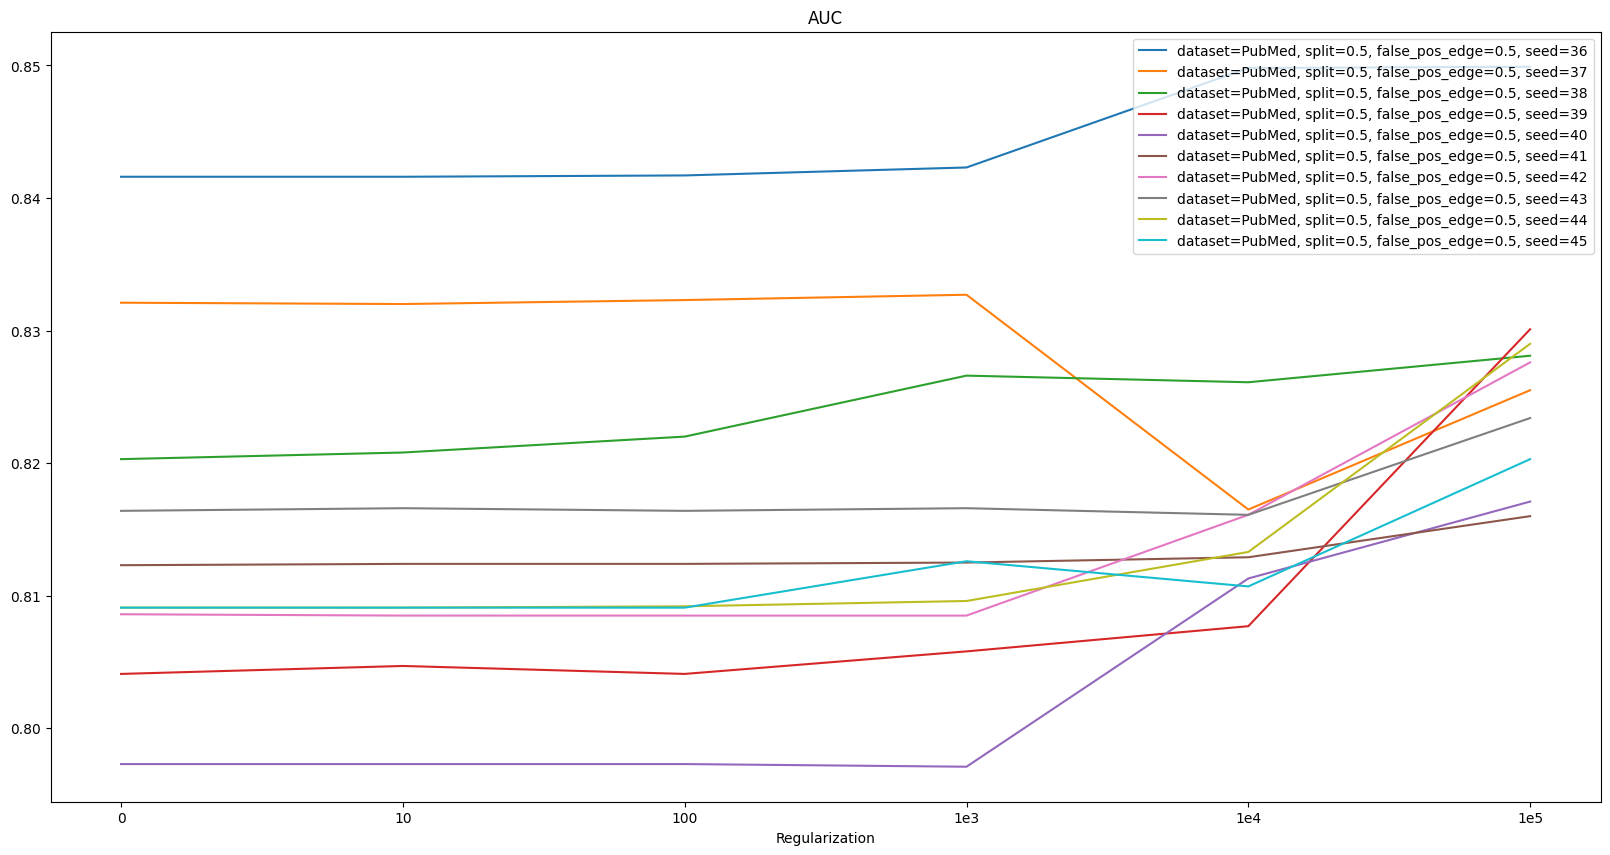

In [33]:
fig, ax = plt.subplots(figsize=(20, 10))

# Get unique seeds
dataset = 'PubMed'
split = 0.5
false_pos_edge = 0.5
seeds = df['seed'].unique()

# plot AUC
for seed in seeds:
    ax.plot([0, 1, 2, 3, 4, 5], df[(df['seed'] == seed)]['AUC'],
               label=f'dataset={dataset}, split={split}, false_pos_edge={false_pos_edge}, seed={seed}')

ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
ax.set_xlabel('Regularization')
ax.set_title('AUC')
ax.legend()

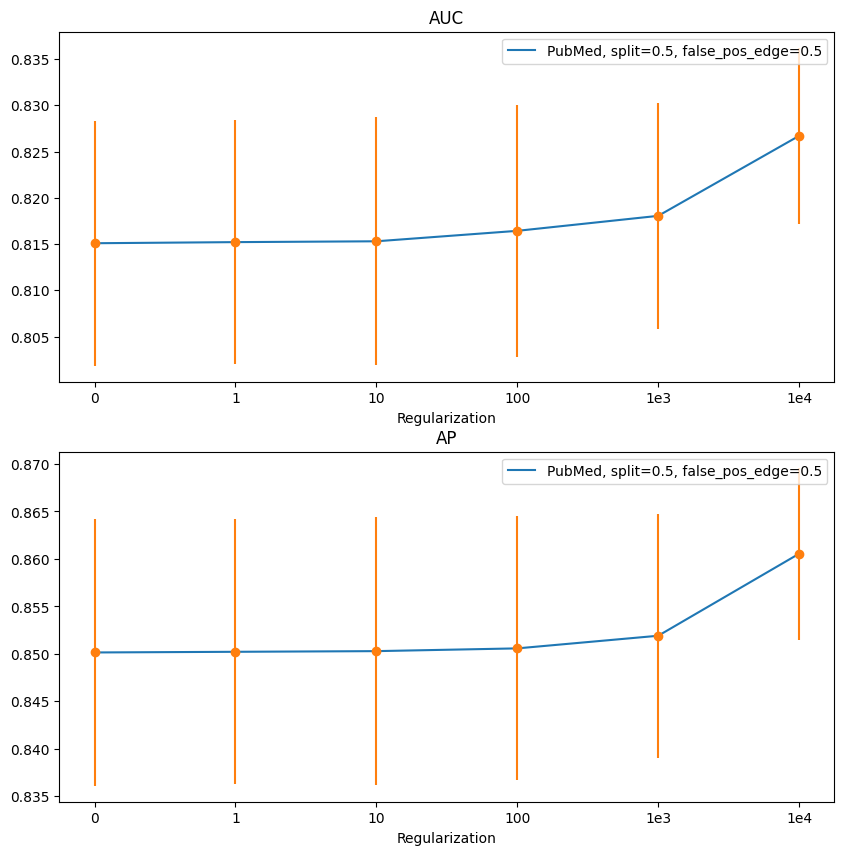

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# plot AUC
ax[0].plot([0, 1, 2, 3, 4, 5],
           df_agg[(df_agg['dataset'] == dataset)]['AUC']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax[0].errorbar([0, 1, 2, 3, 4, 5],
               df_agg[(df_agg['dataset'] == dataset)]['AUC']['mean'],
               yerr=df_agg[(df_agg['dataset'] == dataset)]['AUC']['std'], fmt='o')
ax[0].set_xticks([0, 1, 2, 3, 4, 5])
ax[0].set_xticklabels(['0', '1', '10', '100', '1e3', '1e4'])
ax[0].set_xlabel('Regularization')
ax[0].set_title('AUC')
ax[0].legend()

# plot AP
ax[1].plot([0, 1, 2, 3, 4, 5],
           df_agg[(df_agg['dataset'] == dataset)]['AP']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax[1].errorbar([0, 1, 2, 3, 4, 5],
               df_agg[(df_agg['dataset'] == dataset)]['AP']['mean'],
               yerr=df_agg[(df_agg['dataset'] == dataset)]['AP']['std'], fmt='o')
ax[1].set_xticks([0, 1, 2, 3, 4, 5])
ax[1].set_xticklabels(['0', '1', '10', '100', '1e3', '1e4'])
ax[1].set_xlabel('Regularization')
ax[1].set_title('AP')
ax[1].legend()

Text(0.5, 1.0, 'Execution Time')

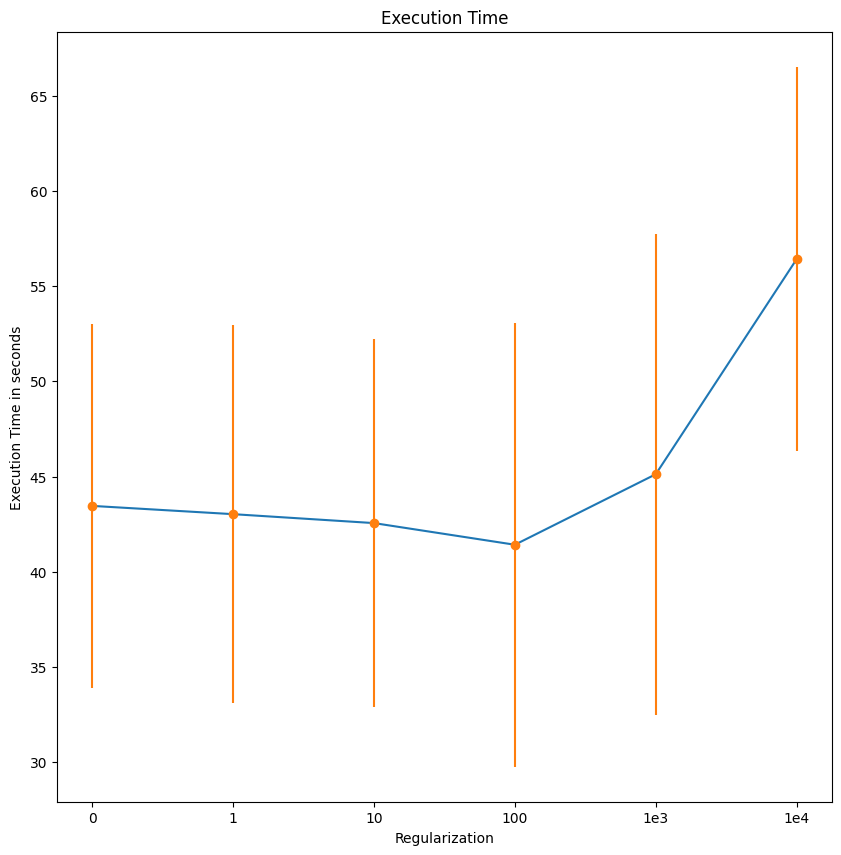

In [45]:
# plot execution time over different regularization
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([0, 1, 2, 3, 4, 5], df_agg[(df_agg['dataset'] == dataset)]['execution_time']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax.errorbar([0, 1, 2, 3, 4, 5],
               df_agg[(df_agg['dataset'] == dataset)]['execution_time']['mean'],
               yerr=df_agg[(df_agg['dataset'] == dataset)]['execution_time']['std'], fmt='o')
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '1', '10', '100', '1e3', '1e4'])
ax.set_xlabel('Regularization')
ax.set_ylabel('Execution Time in seconds')
ax.set_title('Execution Time')